In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import the QICK drivers and auxiliary libraries
from qick import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
# %pylab inline

In [3]:
qick_path = "/home/xilinx/jupyter_notebooks/alternative_firmware/photon_counting_2/qick_4x2.bit"

bitfile=qick_path

In [4]:
soc = QickSoc(bitfile=qick_path)
soccfg = soc

In [5]:
class LoopbackProgram(AveragerProgram):
    def initialize(self):
        cfg=self.cfg   
        
        self.declare_readout(ch=self.cfg['ro_chs'][0], length=self.cfg['readout_length'], freq=0, sel='input')
        
        self.synci(200)  # give processor some time to configure pulses
    
    def body(self):
        self.trigger(adcs=self.ro_chs, 
                     adc_trig_offset=self.cfg["adc_trig_offset"])
        self.synci(int(self.cfg['readout_length'] * 1.25))
        self.wait_all(self.cfg['relax_delay'])

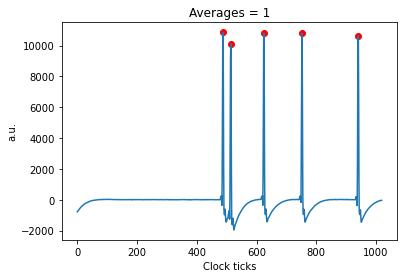

In [6]:
config={"ro_chs":[1], # --Fixed
        "reps": 1,
        "relax_delay":3000, # --us        
        "readout_length":1020, # [Clock ticks]
        "adc_trig_offset": 100, # [Clock ticks]
        "soft_avgs":1
       }

prog =LoopbackProgram(soccfg, config)
iq_list = prog.acquire_decimated(soc, progress=False)

data = iq_list[0][0]

# Plot results.
plt.figure(1)
plt.plot(data)
plt.ylabel("a.u.")
plt.xlabel("Clock ticks")
plt.title("Averages = " + str(config["soft_avgs"]))

x0, _  = find_peaks(data,height=500)
plt.scatter(x0, data[x0], c='red')

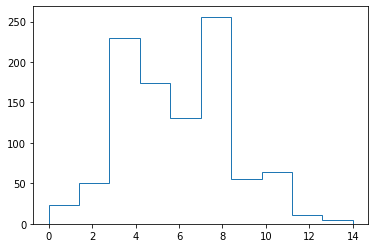

(array([ 23.,  50., 230., 174., 131., 256.,  56.,  64.,  11.,   5.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

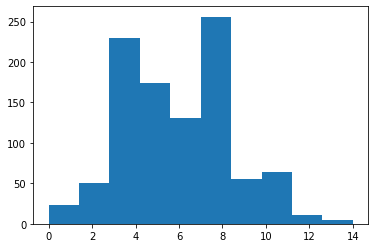

In [7]:
config={"ro_chs":[1], # --Fixed
        "reps": 1,
        "relax_delay":3000, # --us        
        "readout_length":1020, # [Clock ticks]
        "adc_trig_offset": 100, # [Clock ticks]
        "soft_avgs":1
       }

n = []

for i in range(1000):

    prog =LoopbackProgram(soccfg, config)
    iq_list = prog.acquire_decimated(soc, progress=False)

    data = iq_list[0][0]
    x0, _  = find_peaks(data,height=500)
    n.append(len(x0))
counts, bins = np.histogram(n)
plt.stairs(counts, bins)
plt.show()
plt.hist(bins[:-1], bins, weights=counts)

In [148]:
np.uint32(2**32//2), np.uint32(2**32//2)

2147483648

[array([[[0, 0]],

       [[0, 0]],

       [[0, 0]],

       ...,

       [[0, 0]],

       [[0, 0]],

       [[0, 0]]])]


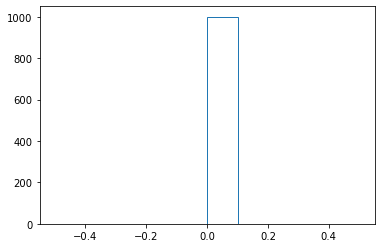

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

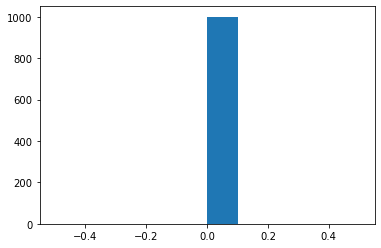

In [25]:
config['reps'] = 1000
config['readout_length'] = 1020
prog =LoopbackProgram(soccfg, config)
iq_list = prog.acquire_counted(soc, high_threshold=10000, low_threshold=0, progress=False)
print(iq_list)
data = np.array([a[0][0] for a in iq_list[0]])

counts, bins = np.histogram(data)
plt.stairs(counts, bins)
plt.show()
plt.hist(bins[:-1], bins, weights=counts)


In [8]:
prog =LoopbackProgram(soccfg, config)
iq_list = prog.acquire(soc, progress=False)
print((np.array(iq_list)/config['readout_length']).astype(float))

[[[[-1.36980392e+01  0.00000000e+00]]

  [[ 1.22941176e+00  0.00000000e+00]]

  [[-3.75372549e+01  0.00000000e+00]]

  [[-1.00156863e+01  0.00000000e+00]]

  [[-1.74803922e+00  0.00000000e+00]]

  [[ 1.19882353e+01  0.00000000e+00]]

  [[-3.93578431e+01  0.00000000e+00]]

  [[ 7.98039216e-01  0.00000000e+00]]

  [[ 1.85980392e+00  0.00000000e+00]]

  [[ 7.00000000e-01  0.00000000e+00]]

  [[ 2.97549020e+00  0.00000000e+00]]

  [[ 1.63676471e+01  0.00000000e+00]]

  [[ 4.80392157e-02  0.00000000e+00]]

  [[-5.42352941e+00  0.00000000e+00]]

  [[-1.88235294e+00  0.00000000e+00]]

  [[-1.09901961e+00  0.00000000e+00]]

  [[-1.61470588e+01  0.00000000e+00]]

  [[-5.76794118e+01  0.00000000e+00]]

  [[-6.82647059e+00  0.00000000e+00]]

  [[-3.11960784e+00  0.00000000e+00]]

  [[-1.98333333e+00  0.00000000e+00]]

  [[-3.06568627e+00  0.00000000e+00]]

  [[-2.45196078e+00  0.00000000e+00]]

  [[ 8.12745098e-01  0.00000000e+00]]

  [[-1.81372549e+00  0.00000000e+00]]

  [[-5.17352941e+00  0.00

In [9]:
print(prog.asm())


// Program

        synci 200;
        regwi 0, $15, 0;
        regwi 0, $14, 99;
LOOP_J: regwi 0, $16, 32768;                    //out = 0b1000000000000000
        seti 7, 0, $16, 100;                    //ch =0 out = $16 @t = 0
        seti 7, 0, $0, 110;                     //ch =0 out = 0 @t = 0
        synci 2040;
        waiti 0, 4120;
        mathi 0, $15, $15 + 1;
        memwi 0, $15, 1;
        loopnz 0, $14, @LOOP_J;
        end ;
